<a href="https://colab.research.google.com/github/YoshifumiMiyagi/KD_ML/blob/main/IP2_%E5%86%8D%E7%99%BA%E7%86%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
SEED=42
import numpy as np
import pandas as pd
import codecs

In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE

In [3]:
raw2 = pd.read_csv("/content/drive/MyDrive/iwashima_project_2.csv", encoding='cp932')
add = pd.read_csv("/content/drive/MyDrive/Dr.Miyagi_R6_5_31_DB_1_add.csv", encoding='cp932')
add_dfa = pd.read_csv("/content/drive/MyDrive/R6_6_10_decrease_fever_analysis_1.csv", encoding='cp932')
raw2.shape

(298, 63)

In [4]:
raw3 = pd.merge(raw2.T, add.T, left_index=True, right_index=True).T
raw3.shape, raw3.columns

((374, 42),
 Index(['ID', 'Age (y)', 'Age (m)', 'Age', 'Length', 'Weight', 'sex',
        '5th Criteria count', 'Onset date', 'Treat day', 'PSL_no_0,1',
        'IVIG-non-responder', 'Response', 'preWBC_1', 'postWBC_1', 'FC_WBC',
        'preNetro', 'post Netro', 'pre_Lym', 'post_Lym', 'preCRP_1',
        'postCRP_1', 'FC_CRP', 'prePlt', 'postPlt', 'FC_Plt', 'preTbil',
        'postTbil', 'FC_Tbil', 'preAST', 'postAST', 'FC_AST', 'preALT',
        'postALT', 'FC_ALT', 'preNa', 'postNa', 'FC_Na', 'preIgG', 'postIgG',
        'preBNP', 'postBNP'],
       dtype='object'))

In [5]:
df_dfa = pd.merge(raw3, add_dfa, on="ID")
df_dfa.shape, df_dfa.columns

((266, 76),
 Index(['ID', 'Age (y)', 'Age (m)', 'Age_x', 'Length', 'Weight', 'sex_x',
        '5th Criteria count', 'Onset date', 'Treat day', 'PSL_no_0,1_x',
        'IVIG-non-responder', 'Response_x', 'preWBC_1', 'postWBC_1', 'FC_WBC',
        'preNetro', 'post Netro', 'pre_Lym', 'post_Lym', 'preCRP_1',
        'postCRP_1', 'FC_CRP', 'prePlt', 'postPlt', 'FC_Plt', 'preTbil',
        'postTbil', 'FC_Tbil', 'preAST', 'postAST', 'FC_AST', 'preALT',
        'postALT', 'FC_ALT', 'preNa', 'postNa', 'FC_Na', 'preIgG', 'postIgG',
        'preBNP', 'postBNP', 'sex_y', 'Age_y', 'Ht', 'Wt', '入院病日', '退院病日',
        'IVIG開始病日', 'IVIG', '1nd', 'PSL_no_0,1_y', 'Response_y', 'MAX_KT',
        'MIN_KT', 'Decrease_KT', 'Finish_IVIG_KT', 'End_time', '実施日', 'Ara',
        'AfterIVIG37.5(無_0.有_1)', 'AfterIVIG37.5day_1', 'AfterIVIG37.5day',
        '24hr_1_', 'startKT', 'Last_rate', 'Last_KT', 'Achieve_rate',
        'Achieve_KT', 'Last_time', 'Achieve_time', 'End_time_1', 'Last_time_1',
        'Achieve_

In [6]:
DF = df_dfa.loc[:,['ID', 'Age_x', 'Length', 'Weight', 'sex_x',
        '5th Criteria count', 'Onset date', 'Treat day', 'PSL_no_0,1_x',
        'IVIG-non-responder', 'Response_x', 'preWBC_1', 'postWBC_1', 'FC_WBC',
        'preNetro', 'post Netro', 'pre_Lym', 'post_Lym', 'preCRP_1',
        'postCRP_1', 'FC_CRP', 'prePlt', 'postPlt', 'FC_Plt', 'preTbil',
        'postTbil', 'FC_Tbil', 'preAST', 'postAST', 'FC_AST', 'preALT',
        'postALT', 'FC_ALT', 'preNa', 'postNa', 'FC_Na', 'preIgG', 'postIgG',
        'preBNP', 'postBNP',  '入院病日', '退院病日',
        'IVIG開始病日', 'IVIG', '1nd',  'MAX_KT',
        'MIN_KT', 'Decrease_KT', 'Finish_IVIG_KT', 'End_time', '実施日', 'Ara',
        'AfterIVIG37.5(無_0.有_1)', 'AfterIVIG37.5day_1', 'AfterIVIG37.5day',
        '24hr_1_', 'startKT', 'Last_rate', 'Last_KT', 'Achieve_rate',
        'Achieve_KT', 'Last_time', 'Achieve_time', 'End_time_1', 'Last_time_1',
        'Achieve_time_1', 'Last_rate.1', 'Achieve_rate.1']]

In [7]:
DF.columns = ['ID', 'Age', 'Length', 'Weight', 'sex',
        '5th Criteria count', 'Onset date', 'Treat day', 'PSL_no_0,1',
        'IVIG-non-responder', 'Response', 'preWBC_1', 'postWBC_1', 'FC_WBC',
        'preNetro', 'post Netro', 'pre_Lym', 'post_Lym', 'preCRP_1',
        'postCRP_1', 'FC_CRP', 'prePlt', 'postPlt', 'FC_Plt', 'preTbil',
        'postTbil', 'FC_Tbil', 'preAST', 'postAST', 'FC_AST', 'preALT',
        'postALT', 'FC_ALT', 'preNa', 'postNa', 'FC_Na', 'preIgG', 'postIgG',
        'preBNP', 'postBNP','admit_day','discharge_day','IVIG_start_day',
        'IVIG_stard_day', 'IVIG', '1nd', 'MAX_KT',
        'MIN_KT', 'Decrease_KT', 'Finish_IVIG_KT', 'End_time', 'Ara',
        'AfterIVIG37.5(no_0.yes_1)', 'AfterIVIG37.5day_1', 'AfterIVIG37.5day',
        '24hr_1_', 'startKT', 'Last_rate', 'Last_KT', 'Achieve_rate',
        'Achieve_KT', 'Last_time', 'Achieve_time', 'End_time_1', 'Last_time_1',
        'Achieve_time_1', 'Last_rate.1', 'Achieve_rate.1']

In [8]:
X = DF.loc[:, ['Age', 'Length', 'Weight', 'sex',
        '5th Criteria count', 'Onset date', 'Treat day', 'preWBC_1', 'postWBC_1', 'FC_WBC',
        'preNetro', 'post Netro', 'pre_Lym', 'post_Lym', 'preCRP_1',
        'postCRP_1', 'FC_CRP', 'prePlt', 'postPlt', 'FC_Plt', 'preTbil',
        'postTbil', 'FC_Tbil', 'preAST', 'postAST', 'FC_AST', 'preALT',
        'postALT', 'FC_ALT', 'preNa', 'postNa', 'FC_Na', 'preIgG', 'postIgG',
        'preBNP', 'postBNP','admit_day',
        'IVIG_stard_day', 'IVIG', '1nd', 'MAX_KT',
        'MIN_KT', 'Decrease_KT', 'Finish_IVIG_KT', 'End_time', 'Ara',
        #'AfterIVIG37.5(no_0.yes_1)',
        'AfterIVIG37.5day_1', 'AfterIVIG37.5day',
        '24hr_1_', 'startKT', 'Last_rate', 'Last_KT', 'Achieve_rate',
        'Achieve_KT', 'Last_time', 'Achieve_time', 'End_time_1', 'Last_time_1',
        'Achieve_time_1', 'Last_rate.1', 'Achieve_rate.1']]
y = DF['AfterIVIG37.5(no_0.yes_1)']

In [12]:
X['sex'] = X['sex'].replace('F',1).replace('M',0).replace('female',1).replace('male',0)

In [13]:
DFLast_time = X['Last_time'].str.split(r":", expand=True)
DFAchieve_time = X['Achieve_time'].str.split(r":", expand=True)
DFLast_rate_1 = X['Last_rate.1'].str.split(r":", expand=True)
DFAchieve_rate_1 = X['Achieve_rate.1'].str.split(r":", expand=True)

DFLast_time.columns = ['Last_h', 'Last_m', 'Last_s']
DFAchieve_time.columns = ['Achieve_h', 'Achieve_m', 'Achieve_s']
DFLast_rate_1.columns = ['Last_rate_h', 'Last_rate_m', 'Last_rate_s']
DFAchieve_rate_1.columns = ['Achieve_rate_h', 'Achieve_rate_m', 'Achieve_rate_s']

In [16]:
DF_Dfa = X.drop(['Last_time', 'Achieve_time', 'Last_rate.1', 'Achieve_rate.1'], axis=1)
DFLA_time = pd.concat([DFLast_time, DFAchieve_time], axis=1)
DFLA_rate = pd.concat([DFLast_rate_1, DFAchieve_rate_1], axis=1)
DF_DFa = pd.concat([DF_Dfa, DFLA_time, DFLA_rate], axis=1)

X2 = DF_DFa.apply(pd.to_numeric, errors='coerce').drop(['Onset date','1nd','End_time','AfterIVIG37.5day_1'],axis=1)

In [43]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 266 non-null    float64
 1   Length              262 non-null    float64
 2   Weight              265 non-null    float64
 3   sex                 266 non-null    int64  
 4   5th Criteria count  264 non-null    float64
 5   Treat day           266 non-null    int64  
 6   preWBC_1            265 non-null    float64
 7   postWBC_1           264 non-null    float64
 8   FC_WBC              265 non-null    float64
 9   preNetro            259 non-null    float64
 10  post Netro          252 non-null    float64
 11  pre_Lym             261 non-null    float64
 12  post_Lym            185 non-null    float64
 13  preCRP_1            263 non-null    float64
 14  postCRP_1           264 non-null    float64
 15  FC_CRP              262 non-null    float64
 16  prePlt  

In [49]:
X2.isna().sum().sort_values(ascending=True)

Age                   0
Last_KT               0
Last_time_1           0
Decrease_KT           0
MIN_KT                0
                   ... 
postBNP             113
24hr_1_             185
AfterIVIG37.5day    185
Finish_IVIG_KT      265
IVIG                266
Length: 65, dtype: int64

In [50]:
X3 = X2.drop(['Finish_IVIG_KT','IVIG'],axis=1)

In [51]:
imp_mean = IterativeImputer(random_state=SEED)
A= imp_mean.fit_transform(X3)
A2 = pd.DataFrame(A, columns=X3.columns)
A2.shape

(266, 63)

In [52]:
X_res1 = A2
y_res1 = y

# Modeling

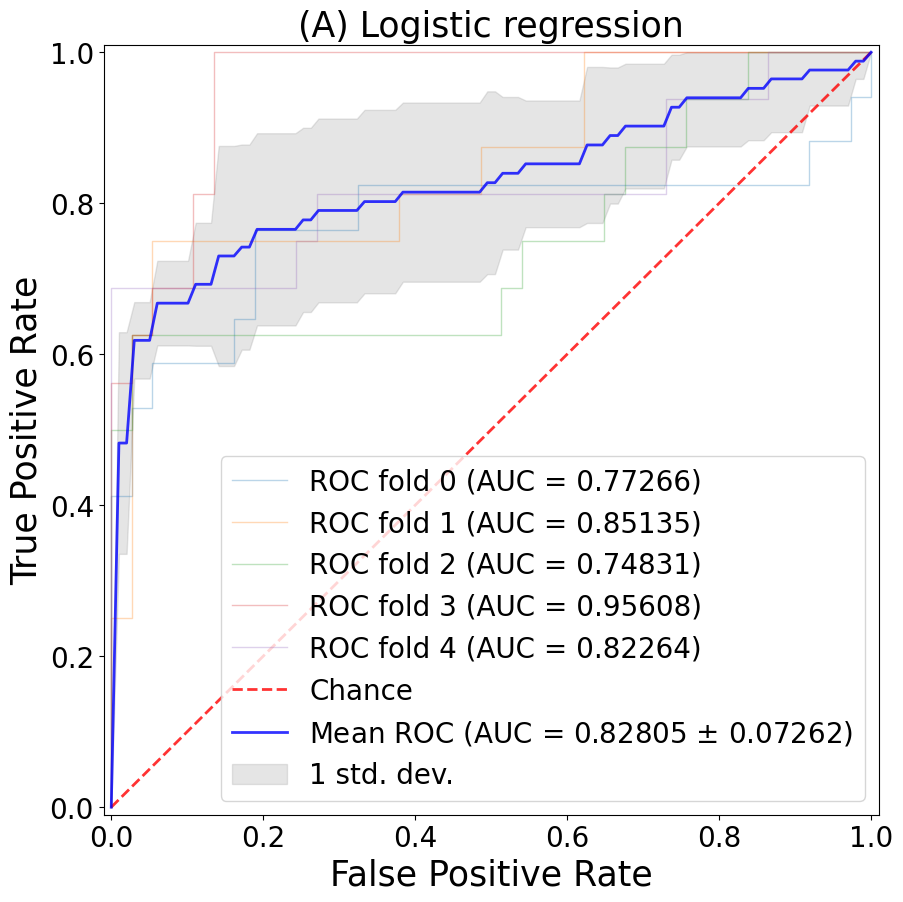

In [55]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
pre =  make_pipeline(StandardScaler(),PowerTransformer(method='yeo-johnson'))
#pre =  make_pipeline(StandardScaler())
classifier = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_res1, y_res1):

    #sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=SEED)
    #X_res2,y_res2 = sm.fit_resample(X_res1.iloc[train], y_res1.iloc[train])


    #X_res3 = pre.fit_transform(X_res2)
    #X_te = pre.transform(X_res1.iloc[test])
    #probas_ = classifier.fit(X_res3, y_res2).predict_proba(X_te)

    #positive_count_train = y_res1.iloc[train].value_counts()[1]
    #strategy = {0:positive_count_train, 1:positive_count_train}
    #rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    #X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    #X_res3 = pre.fit_transform(X_res2)

    X_res3 = pre.fit_transform(X_res1.iloc[train])
    X_te = pre.transform(X_res1.iloc[test])
    probas_ = classifier.fit(X_res3, y_res1.iloc[train]).predict_proba(X_te)



    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_res1.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.xticks(fontsize = 20)
plt.ylim([-0.01, 1.01])
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('(A) Logistic regression',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('(A) LR.png',format="png", dpi=600)
plt.show()

# Random Forest

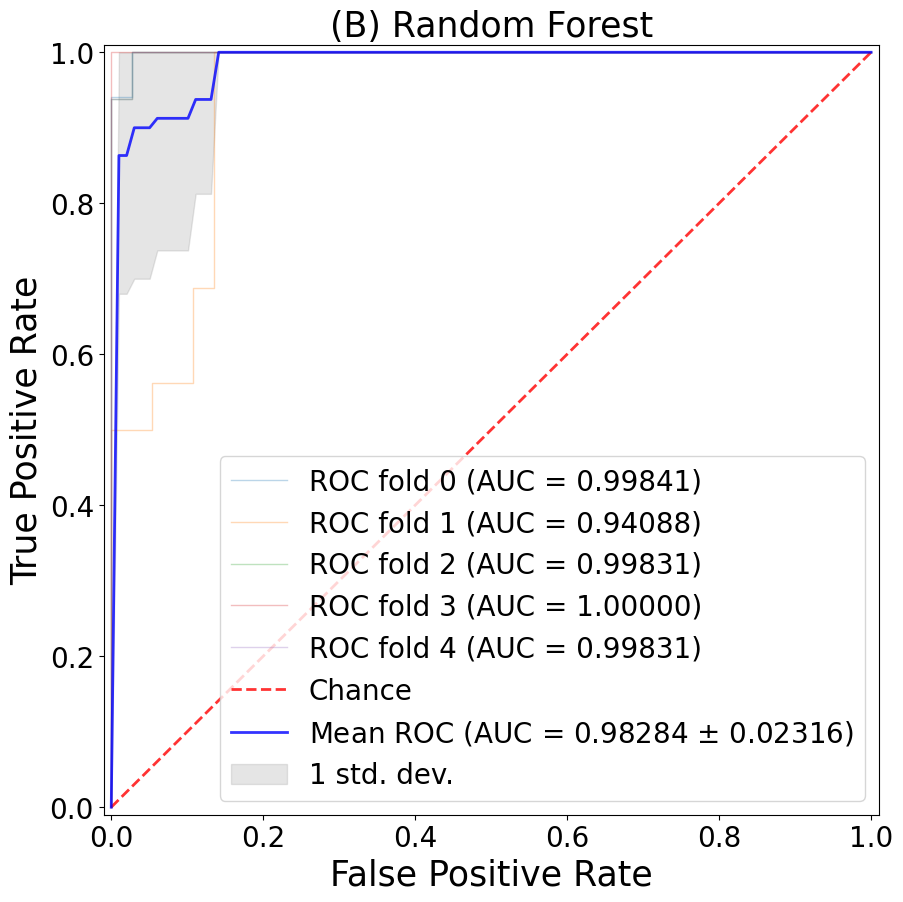

In [84]:
from sklearn.model_selection import KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
classifier =RandomForestClassifier(random_state=SEED,max_depth=3,min_samples_leaf=3,n_estimators=110,min_samples_split=3,max_leaf_nodes=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_res1, y_res1):
    # positive_count_train = y_res1.iloc[train].value_counts()[1]
    # strategy = {0:positive_count_train, 1:positive_count_train}
    # rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    # X_res2, y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    probas_ = classifier.fit(X_res1.iloc[train], y_res1.iloc[train]).predict_proba(X_res1.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_res1.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.xticks(fontsize = 20)
plt.ylim([-0.01, 1.01])
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('(B) Random Forest',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('(B) RF.png',format="png", dpi=600)
plt.show()

# LGBM

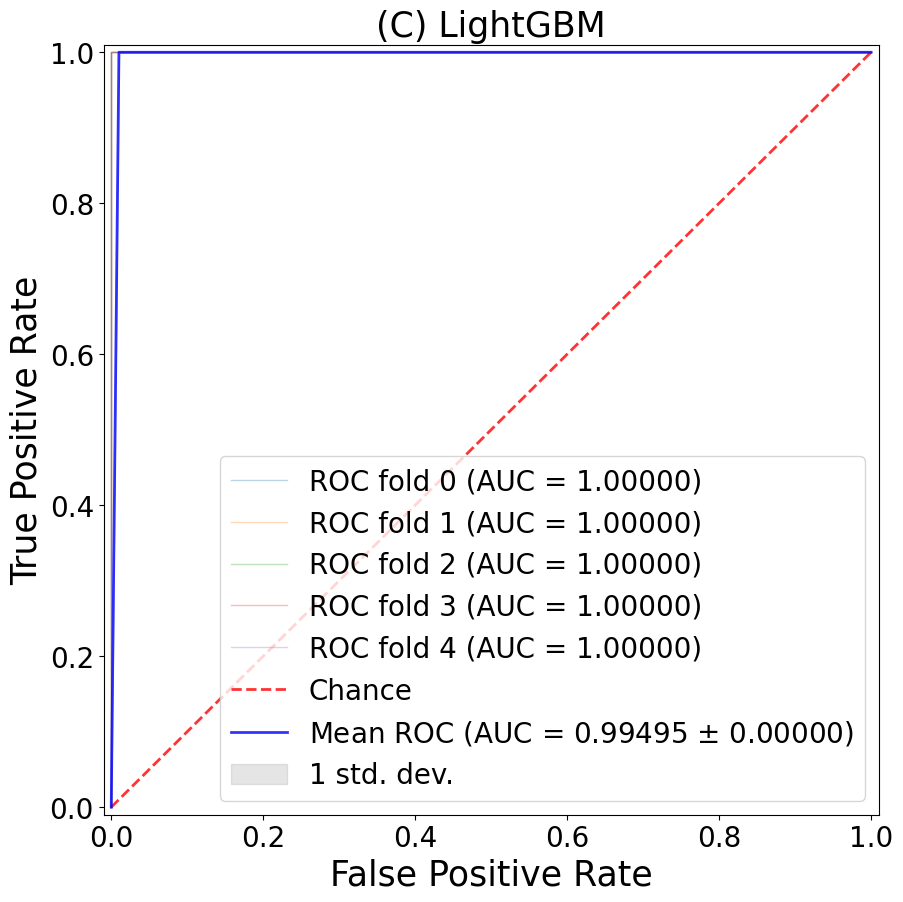

In [88]:
from sklearn.model_selection import KFold, StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)

pre =  make_pipeline(StandardScaler(),PowerTransformer())
classifier = LGBMClassifier(random_state=SEED,boosting_type='gbdt' , n_estimators=20,reg_alpha=0.68062849104778112, reg_lambda=0.5183149895602818, num_leaves=3, colsample_bytree=0.4545491606995836,
                            subsample=0.3285286325866263, subsample_freq=2, min_child_samples=3,verbose=-1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_res1, y_res1):
    # positive_count_train = y_res1.iloc[train].value_counts()[1]
    # strategy = {0:positive_count_train, 1:positive_count_train}
    # rus1 = RandomUnderSampler(random_state=SEED, sampling_strategy = strategy)
    # X_res2,y_res2 = rus1.fit_resample(X_res1.iloc[train], y_res1.iloc[train])
    # X_res3 = pre.fit_transform(X_res2)
    # X_te = pre.transform(X_res1.iloc[test])
    probas_ = classifier.fit(X_res1.iloc[train], y_res1.iloc[train]).predict_proba(X_res1.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_res1.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.5f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.5f $\pm$ %0.5f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.xticks(fontsize = 20)
plt.ylim([-0.01, 1.01])
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('(C) LightGBM',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('(C) LGBM.png',format="png", dpi=600)
plt.show()

In [91]:
!pip install shap

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


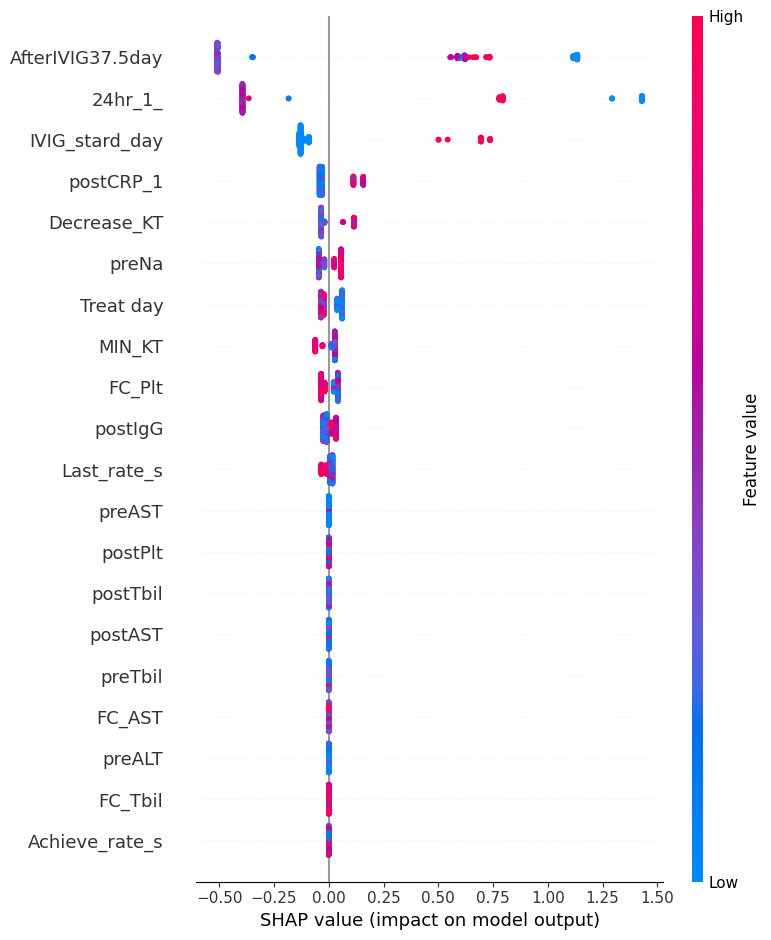

In [90]:
from shap import TreeExplainer
from shap import summary_plot

classifier.fit(X_res1.iloc[train], y_res1.iloc[train])
explainer = TreeExplainer(classifier)
shap_values = np.array(explainer.shap_values(X_res1))
shap_values.shape
summary_plot(shap_values, X_res1,show=False)
plt.savefig('SHAP_LGB.png')